## Project Group 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### For our project we are using 2 data sets: 1. San Francisco Building Permit and 2. San Francisco Crime Data

In [3]:
df2 = pd.read_csv('Building_Permits.csv', index_col=0)
df_crime = pd.read_csv('SF_crime.csv', index_col=0)


In [4]:
df = df2.copy()

In [5]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [6]:
df.shape

(198900, 42)

In [7]:
# Reading Building Data
df.head()

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


#### SF Building_Permit Data Description

Each row is a unique description of a building permit. It has the following columns:

'Permit Number' -  Unique Number assigned while filing a permit

'Permit Type', -   Type of permit representated numerically

'Permit Type Definition', - Description of permit type- new construction, alterations 

'Permit Creation Date', - Date of permit created, later or same as filing date

'Block', - related to address

'Lot', - related to address

'Street Number', - related to address

'Street Number Suffix', - related to address 

'Street Name', - related to address 

'Street Suffix', - related to address

'Unit', - Unit of a building

'Unit Suffix', - Suffix

'Description', - Details for purpose of permit. Like - reroofing, renovation

'Current Status', - current status of permit application

'Current Status Date', - date at which current state was enterned

'Filed Date', - Filed date for the permit

'Issued Date', - Issued date for the permit

'Completed Date', - Date on which project was completed, applicable if current state = 'completed 

'First Construction Document Date', - Date on which construction was documentated

'Structural Notification', -  Notification to meet some legal need, given or not, 

'Number of Existing Stories', - No of existing stories, NA for certain permit type

'Number of Proposed Stories', - Proposed no for construction

'Voluntary Soft-Story Retrofit', - soft story to meet earthquake regulations

'Fire Only Permit', - Fire hazard related permit

'Permit Expiration Date', - Expiration date related to issued permit

'Estimated Cost', - Initial extimation of the cost of the project

'Revised Cost', - revised estimation of the cost of the project

'Existing Use', - Existing use of the building

'Existing Units', - Existing no of units

'Proposed Use', - Proposed use of building

'Proposed Units', - proposed no of units

'Plansets', - the general plan of the design intent of the foundation

'TIDF Compliance', - TIDF compliant or not 

'Existing Construction Type', - Construction type

'Existing Construction Type Description',- Description of the above construction 

'Proposed Construction Type', - construction proposed

'Proposed Construction Type Description', - Proposed construction description

'Site Permit', - Permit for site

'Supervisor District', - Supervisor district to which building belongs to

'Neighborhoods - Analysis Boundaries', - Neighborhood to whoch location

'Zipcode', - zipcode of building address

'Location', - Location in latitude and longitude 

'Record ID' - Some ID 

## DATA CLEANING

### 1. Merging the address and Units columns

In [8]:
df['Street Number Suffix'].isna().any()

True

In [9]:
# Replaceing Nan in Street Number with empty value
df['Street Number Suffix'].replace(to_replace =np.nan, value = '', inplace = True)

In [10]:
df['Street Number Suffix'].isna().any()

False

In [11]:
df['Street Suffix'].isna().any()

True

In [12]:
# Replaceing Nan in Street Suffix with empty value
df['Street Suffix'].replace(to_replace =np.nan, value = '', inplace = True)

In [13]:
df['Street Suffix'].isna().any()

False

In [14]:
df['Street Address'] = df['Street Number'].astype(np.str)

In [15]:
# Merging the complete address
df['Street Address'] = df['Street Address']+df['Street Number Suffix']+" " +df['Street Name']+" " +\
                                                    df['Street Suffix']

In [16]:
df['Street Address'].head(2)

Permit Number
201505065519    140 Ellis St
201604195146    440 Geary St
Name: Street Address, dtype: object

In [17]:
# Changing NaN to empty for unit suffix
df['Unit Suffix'].replace(to_replace =np.nan, value = '', inplace = True)

In [18]:
df['Unit Suffix'].isna().any()

False

In [19]:
# changing Nan to unknown for Unit field
df['Unit'].replace(to_replace =np.nan, value = 'Unknown', inplace = True)

In [20]:
#merging unit and unit suffix - changing type first
df['Unit No'] = df['Unit'].astype(np.str)

In [21]:
df['Unit No'] = df['Unit No']+df['Unit Suffix']

In [22]:
df.head(2)

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,05/06/2015,0326,023,140,,Ellis,St,Unknown,,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,140 Ellis St,Unknown
201604195146,4,sign - erect,04/19/2016,0306,007,440,,Geary,St,0,,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,440 Geary St,0.0


In [23]:
df.drop(columns = ['Street Number','Street Number Suffix','Street Name','Street Suffix', 'Unit'\
                                   , 'Unit Suffix'], axis =1, inplace = True)

### 2. Separating Location column to get latitudes and longitudes

In [24]:
# Seperating Location column to latitude and longitude
df_ll = df.copy()

In [25]:
len(df)

198900

In [26]:
len(df_ll)

198900

In [27]:
df_ll.head(1)

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,140 Ellis St,Unknown


In [28]:
df_ll['Location'].isna().sum()

1700

In [29]:
#selecting only non null values as 1700 is a small percentage of the total dataset
df_ll = df_ll[df['Location'].notnull()]

In [30]:
df_ll['Location'].isna().any()

False

In [31]:
# spliting location in latitudes and longitudes
def split_location(row):

    latitude = row[row.find('(')+1 : row.find(',')]
    longitude = row[row.find(',')+2 :-1]

    return {'latitude' : latitude,
           'longitude' : longitude}


split_df = df_ll['Location'].apply(lambda x: split_location(x))
split_df = pd.DataFrame(list(split_df))

In [32]:
split_df.head(2)

,latitude,longitude
0,37.785719256680785,-122.40852313194863
1,37.78733980600732,-122.41063199757738


In [33]:
len(split_df)

197200

In [34]:
len(df_ll)

197200

In [35]:
len(split_df) == len(df_ll)

True

In [36]:
df_ll = df_ll.reset_index()

In [37]:
df_ll.head(1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No
0,201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,140 Ellis St,Unknown


In [38]:
len(df_ll)

197200

### 3. Merging Latitudes and Longitudes with original data

In [39]:
#merging latitude and latitude with original data
df_location = pd.merge(df_ll, split_df, left_index=True, right_index=True)

In [40]:
len(df_location)


197200

In [41]:
# dropping location column
df_location.drop(columns = ['Location'], axis = 1, inplace = True)

### 4. Renaming Columns

In [42]:
df_location.rename(columns = {'Neighborhoods - Analysis Boundaries':'Neighborhood'}, inplace = True)

In [43]:
df_location.head(1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhood,Zipcode,Record ID,Street Address,Unit No,latitude,longitude
0,201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,1380611233945,140 Ellis St,Unknown,37.785719256680785,-122.40852313194863


### 5. Reassigning Neighborhood to Districts

### Details of Neighborhood under each district:

Bayview - Bayview Hunters Point, McLaren park, Mission Bay, Portola, Potrero Hill 

Central - Chinatown, Nob Hill, North Beach, Presidio, Russian Hill

Ingleside - Excelsior, Oceanview/Merced/Ingleside

Mission - Bernal Heights, Mission, Outer Mission

Northern - Japantown, Marina, Pacific Heights, Presidio Heights

Park - Castro/Upper Market, Glen Park, Haight Ashbury, Hayes Valley, Noe Valley, Western Addition

Richmond - Golden Gate Park, Inner Richmond, Lincoln Park, Lone Mountain/USF, Outer Richmond, Seacliff

Southern - Lakeshore, Twin Peaks, West of Twin Peaks

Taraval - Inner Sunset, Sunset/Parkside                

Tenderloin - Financial District/South Beach, South of Market, Tenderloin, Treasure Island

In [44]:
df_location.loc[df_location['Neighborhood'] == 'Tenderloin', 'PdDistrict'] = 'TENDERLOIN'
df_location.loc[df_location['Neighborhood'] == 'Russian Hill', 'PdDistrict'] = 'CENTRAL'
df_location.loc[df_location['Neighborhood'] == 'Nob Hill', 'PdDistrict'] = 'CENTRAL'
df_location.loc[df_location['Neighborhood'] == 'Potrero Hill', 'PdDistrict'] = 'BAYVIEW'
df_location.loc[df_location['Neighborhood'] == 'Inner Sunset', 'PdDistrict'] = 'TARAVAL'
df_location.loc[df_location['Neighborhood'] == 'Bayview Hunters Point', 'PdDistrict'] = 'BAYVIEW'
df_location.loc[df_location['Neighborhood'] == 'Lone Mountain/USF', 'PdDistrict'] = 'RICHMOND'
df_location.loc[df_location['Neighborhood'] == 'Noe Valley', 'PdDistrict'] = 'PARK'
df_location.loc[df_location['Neighborhood'] == 'Pacific Heights', 'PdDistrict'] = 'NORTHERN'
df_location.loc[df_location['Neighborhood'] == 'Chinatown', 'PdDistrict'] = 'CENTRAL'
df_location.loc[df_location['Neighborhood'] == 'Haight Ashbury', 'PdDistrict'] = 'PARK'
df_location.loc[df_location['Neighborhood'] == 'Castro/Upper Market', 'PdDistrict'] = 'PARK'
df_location.loc[df_location['Neighborhood'] == 'Hayes Valley', 'PdDistrict'] = 'PARK'
df_location.loc[df_location['Neighborhood'] == 'Financial District/South Beach', 'PdDistrict'] = 'TENDERLOIN'
df_location.loc[df_location['Neighborhood'] == 'Sunset/Parkside', 'PdDistrict'] = 'TARAVAL'
df_location.loc[df_location['Neighborhood'] == 'Mission', 'PdDistrict'] = 'MISSION'
df_location.loc[df_location['Neighborhood'] == 'Marina', 'PdDistrict'] = 'NORTHERN'
df_location.loc[df_location['Neighborhood'] == 'Outer Richmond', 'PdDistrict'] = 'RICHMOND'
df_location.loc[df_location['Neighborhood'] == 'Western Addition', 'PdDistrict'] = 'PARK'
df_location.loc[df_location['Neighborhood'] == 'Bernal Heights', 'PdDistrict'] = 'MISSION'
df_location.loc[df_location['Neighborhood'] == 'Inner Richmond', 'PdDistrict'] = 'RICHMOND'
df_location.loc[df_location['Neighborhood'] == 'Oceanview/Merced/Ingleside', 'PdDistrict'] = 'INGLESIDE'
df_location.loc[df_location['Neighborhood'] == 'Outer Mission', 'PdDistrict'] = 'MISSION'
df_location.loc[df_location['Neighborhood'] == 'Portola', 'PdDistrict'] = 'BAYVIEW'
df_location.loc[df_location['Neighborhood'] == 'Mission Bay', 'PdDistrict'] = 'BAYVIEW'
df_location.loc[df_location['Neighborhood'] == 'Visitacion Valley', 'PdDistrict'] = 'BAYVIEW'
df_location.loc[df_location['Neighborhood'] == 'Presidio Heights', 'PdDistrict'] = 'NORTHERN'
df_location.loc[df_location['Neighborhood'] == 'West of Twin Peaks', 'PdDistrict'] = 'SOUTHERN'
df_location.loc[df_location['Neighborhood'] == 'South of Market', 'PdDistrict'] = 'TENDERLOIN'
df_location.loc[df_location['Neighborhood'] == 'Excelsior', 'PdDistrict'] = 'INGLESIDE'
df_location.loc[df_location['Neighborhood'] == 'North Beach', 'PdDistrict'] = 'CENTRAL'
df_location.loc[df_location['Neighborhood'] == 'Glen Park', 'PdDistrict'] = 'PARK'
df_location.loc[df_location['Neighborhood'] == 'Treasure Island', 'PdDistrict'] = 'TENDERLOIN'
df_location.loc[df_location['Neighborhood'] == 'Twin Peaks', 'PdDistrict'] = 'SOUTHERN'
df_location.loc[df_location['Neighborhood'] == 'Lincoln Park', 'PdDistrict'] = 'RICHMOND'
df_location.loc[df_location['Neighborhood'] == 'Japantown', 'PdDistrict'] = 'NORTHERN'
df_location.loc[df_location['Neighborhood'] == 'Lakeshore', 'PdDistrict'] = 'SOUTHERN'
df_location.loc[df_location['Neighborhood'] == 'Seacliff', 'PdDistrict'] = 'RICHMOND'
df_location.loc[df_location['Neighborhood'] == 'Golden Gate Park', 'PdDistrict'] = 'RICHMOND'
df_location.loc[df_location['Neighborhood'] == 'Presidio', 'PdDistrict'] = 'CENTRAL'
df_location.loc[df_location['Neighborhood'] == 'McLaren Park', 'PdDistrict'] = 'BAYVIEW'

In [45]:
df_location.head(2)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhood,Zipcode,Record ID,Street Address,Unit No,latitude,longitude,PdDistrict
0,201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,1380611233945,140 Ellis St,Unknown,37.785719256680785,-122.40852313194863,TENDERLOIN
1,201604195146,4,sign - erect,04/19/2016,0306,007,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,1420164406718,440 Geary St,0.0,37.78733980600732,-122.41063199757738,TENDERLOIN


### 6. Creating a new DataFrame to plot the dataset

In [46]:
df_plot = df_location[['Existing Use','latitude','longitude']]

In [47]:
df_plot.isna().any()

Existing Use     True
latitude        False
longitude       False
dtype: bool

In [48]:
df_plot.dropna(inplace = True)

In [49]:
df_plot.head(3)

,Existing Use,latitude,longitude
0,tourist hotel/motel,37.785719256680785,-122.40852313194863
1,tourist hotel/motel,37.78733980600732,-122.41063199757738
2,retail sales,37.7946573324287,-122.42232562979227


In [50]:
# Converting Existing Use to groups
def Use_Category(Use_String):
    if ((Use_String == 'tourist hotel/motel') | (Use_String == 'residential hotel') | \
        (Use_String == 'food/beverage hndlng')):
        return 1
    elif ((Use_String == '1 family dwelling') | (Use_String == 'apartments') | \
          (Use_String == '2 family dwelling') | (Use_String == 'muni driver restroom') | \
          (Use_String == 'parking lot') | (Use_String == 'prkng garage/private')):
        return 2
    elif ((Use_String == 'church') | (Use_String == 'temple')):
        return 3
    elif ((Use_String == 'swimming pool') | (Use_String == 'bath house') | \
          (Use_String == 'massage parlor') | (Use_String == 'barber/beauty salon') | \
          (Use_String == 'health studios & gym') | (Use_String == 'stadium')):
        return 4
    elif ((Use_String == 'clinics-medic/dental') | (Use_String == 'hospital') | \
          (Use_String == 'nursing home lte 6') | (Use_String == 'day care home lt 7') | \
          (Use_String == 'child care') | (Use_String == 'ambulance service') | \
          (Use_String == 'orphanage') | (Use_String == 'day care center') | \
          (Use_String == 'nursing home gt 6') | (Use_String == 'nursing home non amb') | \
          (Use_String == 'day care, non-res') | (Use_String == 'day care home 7 - 12') | \
          (Use_String == 'day care home gt 12') | (Use_String == 'animal sale or care') | \
          (Use_String == 'social care facility')):
        return 5
    elif ((Use_String == 'misc group residns.') | (Use_String == 'club') | \
          (Use_String == 'artist live/work') | (Use_String == 'amusement center') | \
          (Use_String == 'radio & tv stations') | (Use_String == 'recreation bldg') | \
          (Use_String == 'dance hall') | (Use_String == 'theater') | \
          (Use_String == 'nite club') | (Use_String == 'adult entertainment') | \
          (Use_String == 'christmas tree lot') | (Use_String == 'sound studio')):
        return 6
    elif ((Use_String == 'garment shops') | (Use_String == 'auto repairs') | \
          (Use_String == 'meat/produce marts') | (Use_String == 'warehouse, furniture') | \
          (Use_String == 'nursery(floral)') | (Use_String == 'automobile sales') | \
          (Use_String == 'warehouse,no frnitur') | (Use_String == 'wholesale sales') | \
          (Use_String == 'laundry/laundromat') |(Use_String == 'paint store') | \
          (Use_String == 'retail sales') | (Use_String == 'dry cleaners')):
        return 7
    elif ((Use_String == 'manufacturing') | (Use_String == 'workshop residential') | \
          (Use_String == 'chemical processing') | (Use_String == 'dairies/dairy equip.') | \
          (Use_String == 'power plant') | (Use_String == 'printing plant') | \
          (Use_String == 'workshop commercial') | (Use_String == 'storage tanks') | \
          (Use_String == 'sewage plant') | (Use_String == 'moving & storage') | \
          (Use_String == 'convalescent home') | (Use_String == 'storage shed') | \
          (Use_String == 'greenhouse') | (Use_String == 'car wash') | \
          (Use_String == 'roofing materials') | (Use_String == 'building materials') | \
          (Use_String =='accessory cottage' )):
        return 8
    else:
        return 9

In [51]:
df_plot['ExistingNum'] = df_plot['Existing Use'].apply(Use_Category)

In [52]:
df_plot.head()

,Existing Use,latitude,longitude,ExistingNum
0,tourist hotel/motel,37.785719256680785,-122.40852313194863,1
1,tourist hotel/motel,37.78733980600732,-122.41063199757738,1
2,retail sales,37.7946573324287,-122.42232562979227,7
3,1 family dwelling,37.79595867909168,-122.41557405519474,2
4,retail sales,37.78315261897309,-122.40950883997789,7


In [53]:
import plotly
import plotly.plotly as py 
import plotly.graph_objs.scatter as go
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='pmehta68', api_key='z1XRqzatbBN0r2t7T3dM')


mapbox_access_token = 'pk.eyJ1IjoicG1laHRhNjgiLCJhIjoiY2pra3A4YmVjMXN2ejN3bzk1ODhpcGMwaCJ9.KR38L_8I6zpkHRsiwzBhDw'

data = Data([
    Scattermapbox(
        #We pass the column with the latitudes
        lat=df_plot.latitude,
        #We pass the column with the longitudes
        lon=df_plot.longitude,
        mode='markers',
        marker=Marker(
            size=4,
            #We set the marker color according to the column with the prices
            #color =df_location['Neighborhoods - Analysis Boundaries'],
            color = df_plot['ExistingNum'].values,
            colorscale= 'Rainbow', #'YlOrRd'
            #We show the colorscale to the right
            showscale=True,
            #We set a max to have a better visualization of the colors
            cmax=8,
            cmin=0
        ),
        #We will display the price in each marker
        text=df_plot['Existing Use'],
    )
])
layout = Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        #we have to define the center of the plot
        center=dict(
            lat=37.768543,
            lon=-122.431654
        ),
        pitch=0,
        zoom=12
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pmehta68/0 or inside your plot.ly account where it is named 'Multiple Mapbox'


### Reading Crime Data

In [54]:
df_crime.shape

(878049, 8)

In [55]:
df_crime.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


### Taking data from 2015-2013 for our analysis as building data is from 2013

In [56]:
df_crime = df_crime.head(177956)

In [57]:
len(df_crime)

177956

In [58]:
df_crime=df_crime.reset_index()

In [59]:
df_crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [60]:
df_crime.isna().any()

Dates         False
Category      False
Descript      False
DayOfWeek     False
PdDistrict    False
Resolution    False
Address       False
X             False
Y             False
dtype: bool

#### SF_crime Data Description

Each row is a unique detail of a crime recorded in San Francisco. It has the following columns:

'Dates' -  Unique Date and time when crime was recorded

'Category', - Type of Crime

'Descript', - Description of the crime

'DayOfWeek', - Day of the week when crime occurred

'PdDistrict', - District where crime took place

'Resolution' - Crime Status

'X' - Longitude of the crime place

'Y' - Latitude of the crime place



### Ploting the count of Permit types within each district

In [61]:
df_location.head(1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhood,Zipcode,Record ID,Street Address,Unit No,latitude,longitude,PdDistrict
0,201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,1380611233945,140 Ellis St,Unknown,37.785719256680785,-122.40852313194863,TENDERLOIN


In [62]:
df_sorted = df_location.groupby('PdDistrict').agg({'Permit Type':'count'}).rename(\
                                                        columns = {'Permit Type':'Permit_type_count'})

In [63]:
df_sorted = df_sorted.reset_index()

In [64]:
df_sorted.head()

,PdDistrict,Permit_type_count
0,BAYVIEW,14628
1,CENTRAL,19374
2,INGLESIDE,5726
3,MISSION,22990
4,NORTHERN,21536


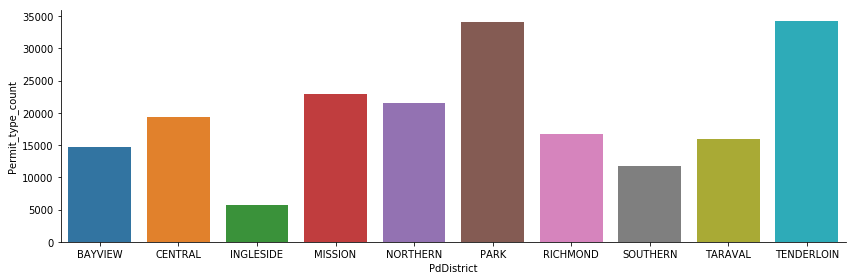

In [65]:
sns.factorplot(x = 'PdDistrict', y = 'Permit_type_count', data = df_sorted, kind = 'bar', aspect = 3)

### Ploting the count of Crime types within each district

In [66]:
df_crime_updated = df_crime.copy()

In [67]:
df_sf_crime = df_crime_updated.groupby('PdDistrict').agg({'Category':'count'}).rename(\
                                                        columns = {'Category':'Crime_count'})

In [68]:
df_sf_crime = df_sf_crime.reset_index()

In [69]:
df_sf_crime

,PdDistrict,Crime_count
0,BAYVIEW,16772
1,CENTRAL,19384
2,INGLESIDE,15394
3,MISSION,23490
4,NORTHERN,21371
5,PARK,10921
6,RICHMOND,9992
7,SOUTHERN,34065
8,TARAVAL,12616
9,TENDERLOIN,13951


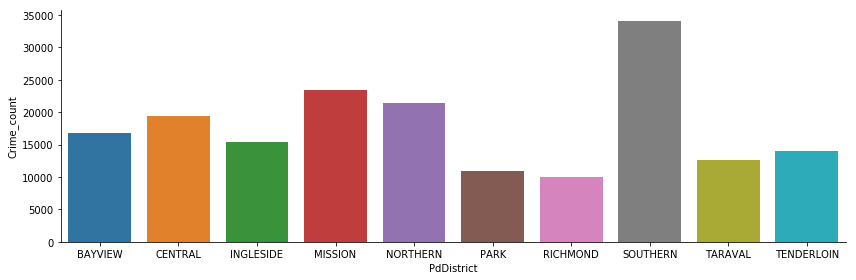

In [70]:
sns.factorplot(x = 'PdDistrict', y = 'Crime_count', data = df_sf_crime, kind = 'bar', aspect = 3)

## Merging Crime with Building Permit

In [71]:
# Merging Dataset
df_merged_data = df_sorted.merge(df_sf_crime, right_on = 'PdDistrict', left_on = 'PdDistrict')

In [72]:
df_merged_data.rename(columns = {'Category':'Crime_total','Permit Type':'Permit_total'}, inplace = True)

In [73]:
df_merged_data

,PdDistrict,Permit_type_count,Crime_count
0,BAYVIEW,14628,16772
1,CENTRAL,19374,19384
2,INGLESIDE,5726,15394
3,MISSION,22990,23490
4,NORTHERN,21536,21371
5,PARK,34162,10921
6,RICHMOND,16775,9992
7,SOUTHERN,11749,34065
8,TARAVAL,15983,12616
9,TENDERLOIN,34252,13951


In [74]:
df_CPP = df_merged_data.copy()

In [75]:
df_CPP

,PdDistrict,Permit_type_count,Crime_count
0,BAYVIEW,14628,16772
1,CENTRAL,19374,19384
2,INGLESIDE,5726,15394
3,MISSION,22990,23490
4,NORTHERN,21536,21371
5,PARK,34162,10921
6,RICHMOND,16775,9992
7,SOUTHERN,11749,34065
8,TARAVAL,15983,12616
9,TENDERLOIN,34252,13951


In [76]:
# Calculating Crime per permit for better analysis
df_CPP['CPP'] = (df_CPP['Crime_count'])/(df_CPP['Permit_type_count'])

In [77]:
df_CPP

,PdDistrict,Permit_type_count,Crime_count,CPP
0,BAYVIEW,14628,16772,1.146568
1,CENTRAL,19374,19384,1.000516
2,INGLESIDE,5726,15394,2.688439
3,MISSION,22990,23490,1.021749
4,NORTHERN,21536,21371,0.992338
5,PARK,34162,10921,0.319683
6,RICHMOND,16775,9992,0.595648
7,SOUTHERN,11749,34065,2.899396
8,TARAVAL,15983,12616,0.789339
9,TENDERLOIN,34252,13951,0.407305


## Finding 1 - 

<div class = "alert alert-block alert-success"> <b>On merging the datsets and grouping them by district we found that Crimes Per Permit are way high in Ingleside and Southern district</b>
</div>

#### From the table we can say:
    1 - Crimes in Souhtern and Mission are greater in number than the other districts
    2 - Though crimes are higher there, when we do Crime Per Pemrit, Ingleside district becomes the top crime 
    area followed by Southern district

## Validation of the above finding

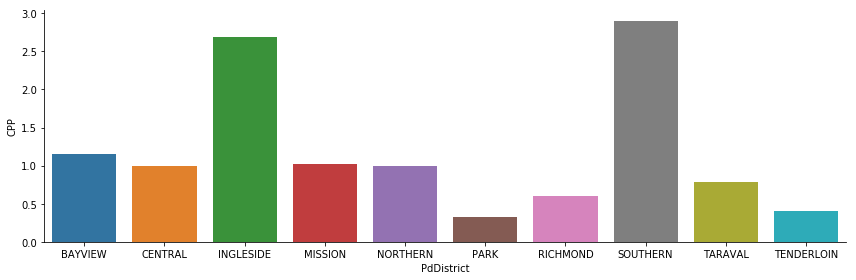

In [78]:
sns.factorplot(x='PdDistrict', y ='CPP', data = df_CPP, kind = 'bar', aspect = 3)

<div class = "alert alert-block alert-success"> <b> From the graph we can clearly see that crimes per permit in Ingleside and Southern are way higher than other districts </b>
</div>

<img src="SF_Districts_color_neighborhoods-2012.jpg">

<div class = "alert alert-block alert-success"> <b> Managerial Insight - 
This information is useful to the police department. They can now assign more police patroling. 
    
This being a residential area, there are more crimes happening. The Government should give more permits to build more commercial buildings here to reduce the crime. What is interesting here is that these two districts (7 & 11) in the map are close to each other and from the previous map we have seen that these are residential areas.  

As we know crimes usually are common in the downtowns, this is an unusal case where more crimes are happening in residential area and not the downtown. The permits given here are very less as it is a crime prone area.

Also, the builders should come up with the ideas of having non commercial buildings in these districts. If permits are given for non commercial regions, crimes might reduce in these areas.</b>
</div>

## Finding 2 - 

<div class = "alert alert-block alert-success"> <b> Types of crimes differ in these 2 areas, despite the CPP being almost the same and these regions being next to each other. <b>
<div>   

#### For better analysis we are taking the top 5 crimes in both the high CPP (Crime Per Permits - as shown in finding 2) districts

In [79]:
df_top_10_crimes = df_crime[(df_crime.PdDistrict == 'SOUTHERN')| (df_crime.PdDistrict == 'INGLESIDE')].\
                groupby('PdDistrict').apply(lambda d: d.groupby('Category').size().nlargest(5))

In [80]:
df_top_10_crimes = df_top_10_crimes.reset_index()

In [81]:
df_top_10_crimes.columns = ['PdDistrict',
            'Category',
            'Crime_total']

In [82]:
df_top_10_crimes

,PdDistrict,Category,Crime_total
0,INGLESIDE,OTHER OFFENSES,2487
1,INGLESIDE,LARCENY/THEFT,2474
2,INGLESIDE,NON-CRIMINAL,1624
3,INGLESIDE,VEHICLE THEFT,1593
4,INGLESIDE,ASSAULT,1560
5,SOUTHERN,LARCENY/THEFT,11302
6,SOUTHERN,NON-CRIMINAL,4725
7,SOUTHERN,OTHER OFFENSES,3904
8,SOUTHERN,ASSAULT,2420
9,SOUTHERN,WARRANTS,1767


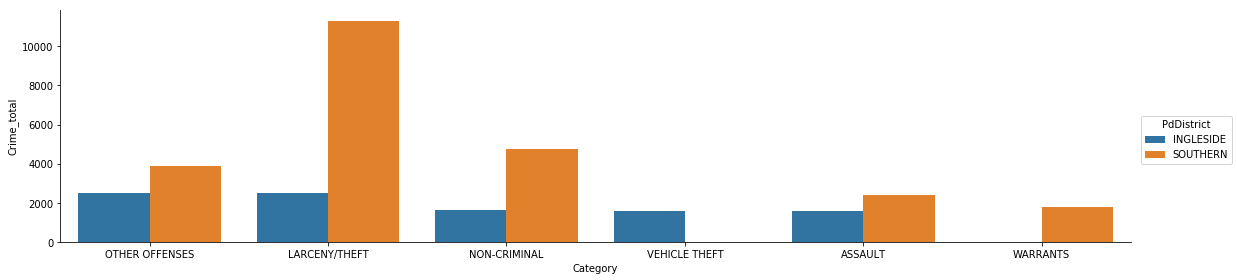

In [83]:
sns.factorplot(x='Category', y = 'Crime_total', hue = 'PdDistrict', kind = 'bar', aspect = 4, data = df_top_10_crimes)

<div class = "alert alert-block alert-success"> <b>Managerial Insight: From the above graph, we can conclude that  theft stands out among all the other crimes in both these districts. What is surprising is that, Vehicle theft doesnot stand out in top 5 crimes in Southern District while is it in top 5 crimes in Ingleside. So is the case with Warrants. SFPD (San Frnacisco Police Department) should focus on reducing the theft then any other crimes from these regions. <b>
<div>   

#### Further analysing theft crime in Southern District to see which day has the maximum crime

In [84]:
df_crime_days = df_crime[(df_crime.PdDistrict == 'SOUTHERN')]

In [85]:
df_crime_theft = df_crime_days[(df_crime_days.Category == 'LARCENY/THEFT')]

In [86]:
df_crime_theft_days = df_crime_theft.groupby('DayOfWeek')['Category'].count()

In [87]:
df_crime_theft_days = df_crime_theft_days.reset_index()

In [88]:
df_crime_theft_days.columns = ['DayOfWeek',
            'Day_Theft_total']

In [89]:
df_crime_theft_days

,DayOfWeek,Day_Theft_total
0,Friday,1849
1,Monday,1535
2,Saturday,1860
3,Sunday,1578
4,Thursday,1521
5,Tuesday,1393
6,Wednesday,1566


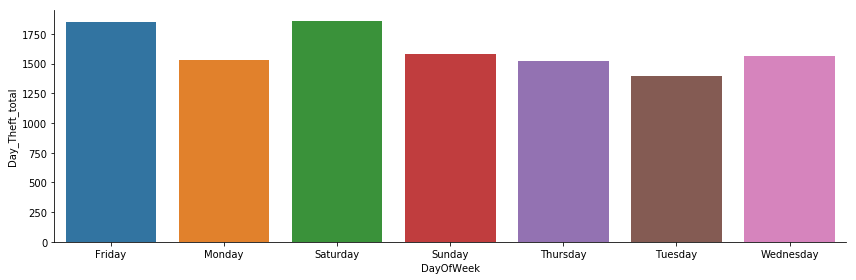

In [90]:
sns.factorplot(x='DayOfWeek', y = 'Day_Theft_total', data = df_crime_theft_days, kind = 'bar', aspect = 3)

<div class = "alert alert-block alert-success"> <b>Managerial Insight: From this we can say that Fridays and Saturdays are the most theft crime days. This is true as its a weekend and most people are not at their homes on weekends. Sothern district is mostly residential and people are usually not at home in weekends. So this holds true for crimes being most on weekends. This is even surprising that crimes are happening when people are not there.  <b>
    <div>

## Finding 3-

<div class = "alert alert-block alert-success"> <b> A guide and an interesting finding for builders, contrators, real estate agents and civil engineers. Builders can look at these average wait times and plan ahead as to when they want to file their permits so that they can receive them on time and their construction work is not delayed.<b>
<div>

#### We also use Regression model to explore the data and find the conditions in which the wait time is the least. 

In [91]:
df.head()

,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No
Permit Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,140 Ellis St,Unknown
201604195146,4,sign - erect,04/19/2016,0306,007,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,440 Geary St,0.0
201605278609,3,additions alterations or repairs,05/27/2016,0595,203,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716,1647 Pacific Av,Unknown
201611072166,8,otc alterations permit,11/07/2016,0156,011,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,1230 Pacific Av,0.0
201611283529,6,demolitions,11/28/2016,0342,001,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,950 Market St,Unknown


In [92]:
df = df.reset_index()

In [93]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No
0,201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,140 Ellis St,Unknown
1,201604195146,4,sign - erect,04/19/2016,0306,007,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,440 Geary St,0.0
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716,1647 Pacific Av,Unknown
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,1230 Pacific Av,0.0
4,201611283529,6,demolitions,11/28/2016,0342,001,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,950 Market St,Unknown


#### Further cleaning the data to do this analysis

In [94]:
# Coverting the string columns of Issued and Filed date to datetime
df['Issued Date'] = pd.to_datetime(df['Issued Date'])
df['Filed Date'] = pd.to_datetime(df['Filed Date'])

In [95]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No
0,201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,2015-05-06,2015-11-09,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,140 Ellis St,Unknown
1,201604195146,4,sign - erect,04/19/2016,0306,007,remove (e) awning and associated signs.,issued,08/03/2017,2016-04-19,2017-08-03,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,440 Geary St,0.0
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,installation of separating wall,withdrawn,09/26/2017,2016-05-27,NaT,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716,1647 Pacific Av,Unknown
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,repair dryrot & stucco at front of bldg.,complete,07/24/2017,2016-11-07,2017-07-18,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,1230 Pacific Av,0.0
4,201611283529,6,demolitions,11/28/2016,0342,001,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,2016-11-28,2017-12-01,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,950 Market St,Unknown


In [96]:
# Checking for Nan values. Issued Date has Nan values as not all permits have been issued.
df['Filed Date'].isna().any()
df['Issued Date'].isna().any()

False

True

In [97]:
# Finding the number of days required for permit issuance
df['Days Required for Permit Issuance'] = df['Issued Date'] - df['Filed Date']

In [98]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No,Days Required for Permit Issuance
0,201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,2015-05-06,2015-11-09,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,140 Ellis St,Unknown,187 days
1,201604195146,4,sign - erect,04/19/2016,0306,007,remove (e) awning and associated signs.,issued,08/03/2017,2016-04-19,2017-08-03,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,440 Geary St,0.0,471 days
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,installation of separating wall,withdrawn,09/26/2017,2016-05-27,NaT,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716,1647 Pacific Av,Unknown,NaT
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,repair dryrot & stucco at front of bldg.,complete,07/24/2017,2016-11-07,2017-07-18,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,1230 Pacific Av,0.0,253 days
4,201611283529,6,demolitions,11/28/2016,0342,001,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,2016-11-28,2017-12-01,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,950 Market St,Unknown,368 days


In [99]:
df['Days Required for Permit Issuance'] = df['Days Required for Permit Issuance']/np.timedelta64(1,'D')

In [100]:
df.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No,Days Required for Permit Issuance
0,201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,2015-05-06,2015-11-09,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,140 Ellis St,Unknown,187.0
1,201604195146,4,sign - erect,04/19/2016,0306,007,remove (e) awning and associated signs.,issued,08/03/2017,2016-04-19,2017-08-03,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,440 Geary St,0.0,471.0
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,installation of separating wall,withdrawn,09/26/2017,2016-05-27,NaT,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716,1647 Pacific Av,Unknown,NaN
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,repair dryrot & stucco at front of bldg.,complete,07/24/2017,2016-11-07,2017-07-18,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,1230 Pacific Av,0.0,253.0
4,201611283529,6,demolitions,11/28/2016,0342,001,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,2016-11-28,2017-12-01,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,950 Market St,Unknown,368.0


In [101]:
df[df['Days Required for Permit Issuance'] == 1555]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No,Days Required for Permit Issuance
171174,201310179631,8,otc alterations permit,10/17/2013,0281,017,revision to pa# 2013-0502-6021-redo interior s...,issued,01/19/2018,2013-10-17,2018-01-19,NaN,01/19/2018,NaN,6.0,6.0,NaN,NaN,07/19/2018,1.0,14000.0,apartments,16.0,apartments,16.0,2.0,NaN,3.0,constr type 3,3.0,constr type 3,NaN,3.0,Nob Hill,94109.0,"(37.78917632288766, -122.41425318952345)",1321257298999,1035 Bush St,0.0,1555.0


In [102]:
# Grouping by Permit Type Definition and finding average number of days required for each type of permit issuance
df_Permit = df.groupby(by = ['Permit Type Definition'])['Days Required for Permit Issuance'].agg(['mean']). \
                            rename(columns = {'mean':'Average Number of Days Required for Permit Issuance'})

In [103]:
df_Permit

,Average Number of Days Required for Permit Issuance
Permit Type Definition,
additions alterations or repairs,247.252251
demolitions,348.175066
grade or quarry or fill or excavate,97.307692
new construction,478.602273
new construction wood frame,398.143095
otc alterations permit,10.870757
sign - erect,52.724511
wall or painted sign,45.348066


In [104]:
df_Permit = df_Permit.reset_index()

In [105]:
df_Permit

,Permit Type Definition,Average Number of Days Required for Permit Issuance
0,additions alterations or repairs,247.252251
1,demolitions,348.175066
2,grade or quarry or fill or excavate,97.307692
3,new construction,478.602273
4,new construction wood frame,398.143095
5,otc alterations permit,10.870757
6,sign - erect,52.724511
7,wall or painted sign,45.348066


### This graph tells us the average days required for issuance for each type of permit

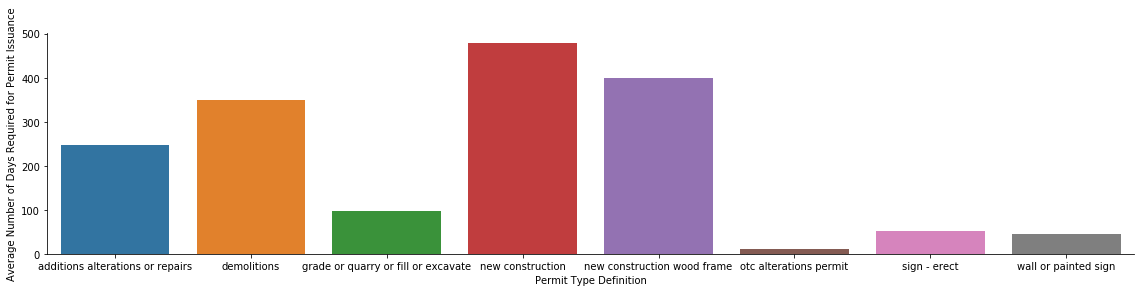

In [106]:
sns.factorplot(x = 'Permit Type Definition', y = 'Average Number of Days Required for Permit Issuance', \
               data = df_Permit, kind = 'bar', aspect = 4)

<div class = "alert alert-block alert-success"> <b>Managerial Insight: From the above graph, we can conclude that even additions, alterations or repairs take 7 to 8 months for permit issuance which is matter of concern. OTC alterations permit take very few days , within approximately a week, the approvals are received which tells us that Department of Inspections and Planning is doing a good job. <b>
<div>   

#### Applying Decision Tree Regressor and Lasso Regression Model

In [107]:
# Taking the original dataframe in a new dataframe
df_Regressor = df

In [108]:
df_Regressor.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,Street Address,Unit No,Days Required for Permit Issuance
0,201505065519,4,sign - erect,05/06/2015,0326,023,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,2015-05-06,2015-11-09,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,140 Ellis St,Unknown,187.0
1,201604195146,4,sign - erect,04/19/2016,0306,007,remove (e) awning and associated signs.,issued,08/03/2017,2016-04-19,2017-08-03,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,440 Geary St,0.0,471.0
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,installation of separating wall,withdrawn,09/26/2017,2016-05-27,NaT,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.0,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716,1647 Pacific Av,Unknown,NaN
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,repair dryrot & stucco at front of bldg.,complete,07/24/2017,2016-11-07,2017-07-18,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566,1230 Pacific Av,0.0,253.0
4,201611283529,6,demolitions,11/28/2016,0342,001,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,2016-11-28,2017-12-01,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992,950 Market St,Unknown,368.0


In [109]:
# Dropping all string columns
df_Regressor.drop(columns = ['Permit Type Definition','Permit Creation Date','Block','Lot','Description',\
                             'Current Status Date','Filed Date','Issued Date','Completed Date',\
                             'First Construction Document Date','Structural Notification',\
                             'Permit Expiration Date','Existing Use','Proposed Use',\
                            'Existing Construction Type Description',\
                             'Proposed Construction Type Description',
                            'Location','Unit No', 'Permit Number','Voluntary Soft-Story Retrofit', \
                            'Fire Only Permit','TIDF Compliance','Site Permit'], inplace = True)

In [110]:
df_Regressor.drop(labels = ['Neighborhoods - Analysis Boundaries','Street Address'], axis = 1, inplace = True)

In [111]:
df_Regressor.head()

,Permit Type,Current Status,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID,Days Required for Permit Issuance
0,4,expired,6.0,NaN,4000.0,4000.0,143.0,NaN,2.0,3.0,NaN,3.0,94102.0,1380611233945,187.0
1,4,issued,7.0,NaN,1.0,500.0,NaN,NaN,2.0,3.0,NaN,3.0,94102.0,1420164406718,471.0
2,3,withdrawn,6.0,6.0,20000.0,NaN,39.0,39.0,2.0,1.0,1.0,3.0,94109.0,1424856504716,NaN
3,8,complete,2.0,2.0,2000.0,2000.0,1.0,1.0,2.0,5.0,5.0,3.0,94109.0,1443574295566,253.0
4,6,issued,3.0,NaN,100000.0,100000.0,NaN,NaN,2.0,3.0,NaN,6.0,94102.0,144548169992,368.0


In [112]:
# Getting dummy values for Current Status column
df_Regressor = pd.get_dummies(df_Regressor, columns = ['Current Status'])

### Now we are having only float or int values in df_Regressor

In [113]:
df_Regressor.head()

,Permit Type,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID,Days Required for Permit Issuance,Current Status_appeal,Current Status_approved,Current Status_cancelled,Current Status_complete,Current Status_disapproved,Current Status_expired,Current Status_filed,Current Status_incomplete,Current Status_issued,Current Status_plancheck,Current Status_reinstated,Current Status_revoked,Current Status_suspend,Current Status_withdrawn
0,4,6.0,NaN,4000.0,4000.0,143.0,NaN,2.0,3.0,NaN,3.0,94102.0,1380611233945,187.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4,7.0,NaN,1.0,500.0,NaN,NaN,2.0,3.0,NaN,3.0,94102.0,1420164406718,471.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,6.0,6.0,20000.0,NaN,39.0,39.0,2.0,1.0,1.0,3.0,94109.0,1424856504716,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,8,2.0,2.0,2000.0,2000.0,1.0,1.0,2.0,5.0,5.0,3.0,94109.0,1443574295566,253.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,6,3.0,NaN,100000.0,100000.0,NaN,NaN,2.0,3.0,NaN,6.0,94102.0,144548169992,368.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [114]:
# Dropping all Nan values
df_Regressor.dropna(inplace = True)

In [115]:
df_Regressor.isna().sum().sum()

0

In [116]:
df_Regressor['Permit Type'].unique()

array([8, 3, 2])

#### Creating X and Y for our Regression models. Then we will fit this X and Y in both the models of Regression

In [117]:
X = df_Regressor.drop('Days Required for Permit Issuance', axis = 1)

In [118]:
Y = df_Regressor['Days Required for Permit Issuance']

In [119]:
from sklearn import linear_model
regLasso = linear_model.Lasso()

In [120]:
regLasso.fit(X,Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
import sklearn.tree

In [122]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 2)

In [123]:
dt.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

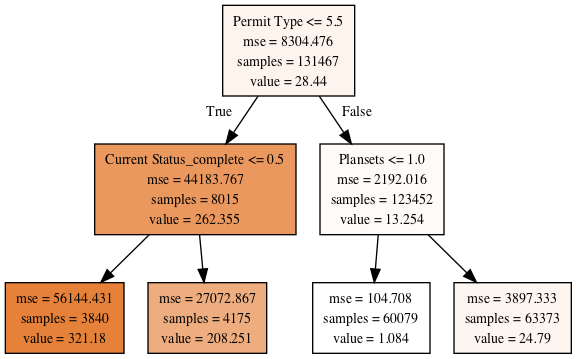

In [124]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### Thus, from the above decision tree we can conclude that if Premit Types are from 1 to 5, then it takes maximum to receive permit issuance. Else if the permit types are 6,7 and 8, then depending on number of plansets we can receive faster approvals.

# Validation

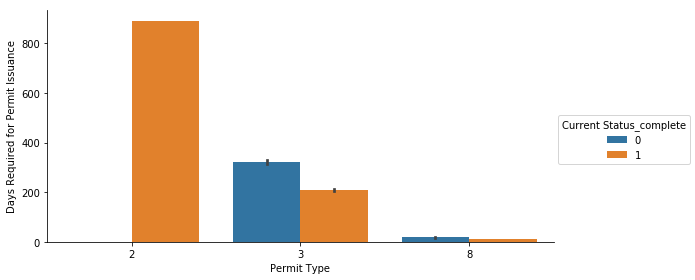

In [125]:
sns.factorplot(x='Permit Type', y='Days Required for Permit Issuance', hue = 'Current Status_complete',\
              kind = 'bar', data = df_Regressor, aspect = 2)

### Validating the finding of above decision tree, permit type 2 and 3 take larger approval days than permit type 8.

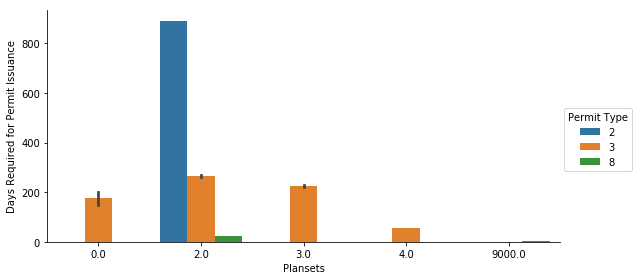

In [126]:
sns.factorplot(x='Plansets', y='Days Required for Permit Issuance', hue = 'Permit Type',\
              kind = 'bar', data = df_Regressor, aspect = 2)

### Hence validated that permit type 8 having lesser number of plansets receive faster approvals.

### Trying to predict number of days required for permit issuance using Lasso Regression model.

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                    test_size=.3,random_state=0)

In [129]:
regLasso = linear_model.Lasso()

In [130]:
regLasso.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [131]:
y_pred = regLasso.predict(X_test)

In [132]:
y_pred

array([ 22.06157835,   5.38637785,  11.35324706, ...,  10.40241653,
        11.24488451,  10.95825825])

<div class = "alert alert-block alert-success"> <b> Machine Learning - We have used Decisio Tree Regressor and Lasso Regression Model for our analysis and the code is used above. <b>
<div>